In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import pandas as pd
from pathlib import Path
from tqdm.notebook import tqdm
import random
from collections import defaultdict
import matplotlib.pyplot as plt


Bad key "text.kerning_factor" on line 4 in
C:\Users\onomatopeia\.conda\envs\modelling-ncov2019\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


In [3]:
import os
if os.getcwd().endswith('notebooks'):
    os.chdir(os.path.join(os.getcwd(), os.pardir))
# os.getcwd()

In [4]:
from bootstrapping import attack_rate

Calculating young fellows: 100%|███████████████| 16/16 [01:45<00:00,  6.60s/it]


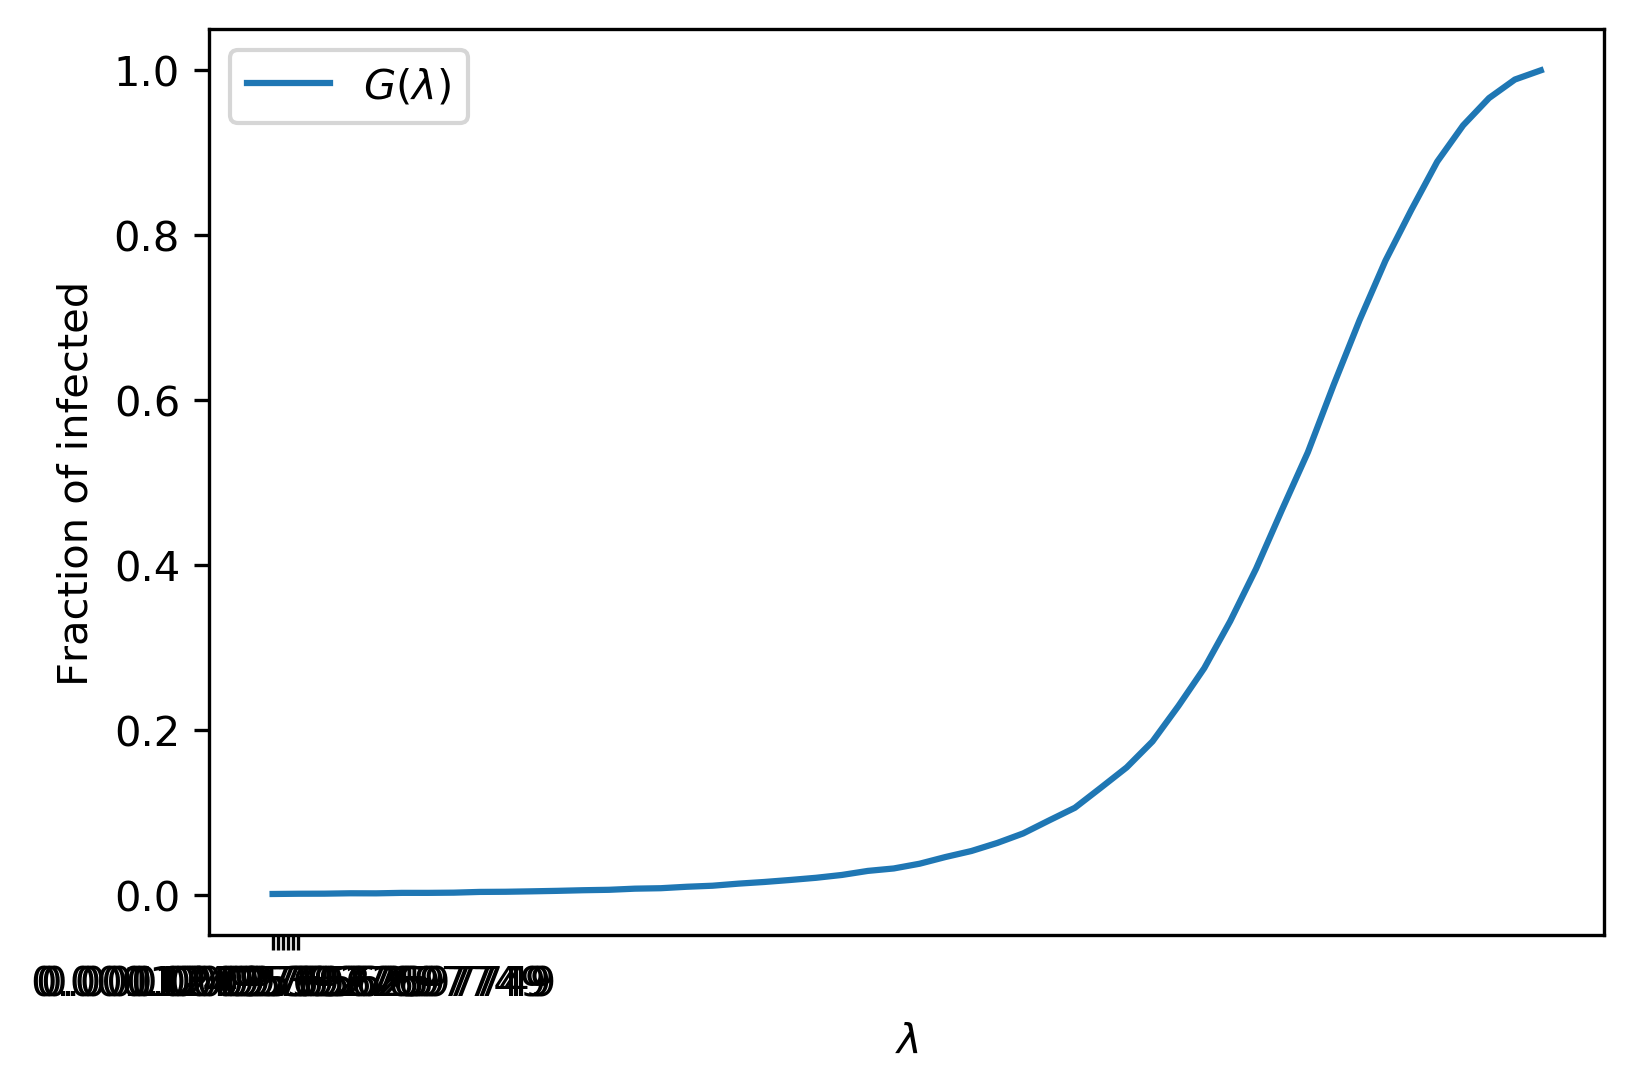

In [5]:
g_df = attack_rate.get_g_function_full_range()

In [6]:
g_df

,lambda,G
0,0.0009765625,0.000940
1,0.001124953927697749,0.001236
2,0.0012958938515892147,0.001318
3,0.0014928085793020427,0.001794
4,0.0017196450555768113,0.001712
5,0.001980949974545562,0.002303
6,0.002281960913344293,0.002286
7,0.002628711313735071,0.002545
8,0.003028151415981853,0.003444
9,0.003488287568970021,0.003632


In [7]:
%matplotlib notebook
import matplotlib.pyplot as plt


<IPython.core.display.Javascript object>


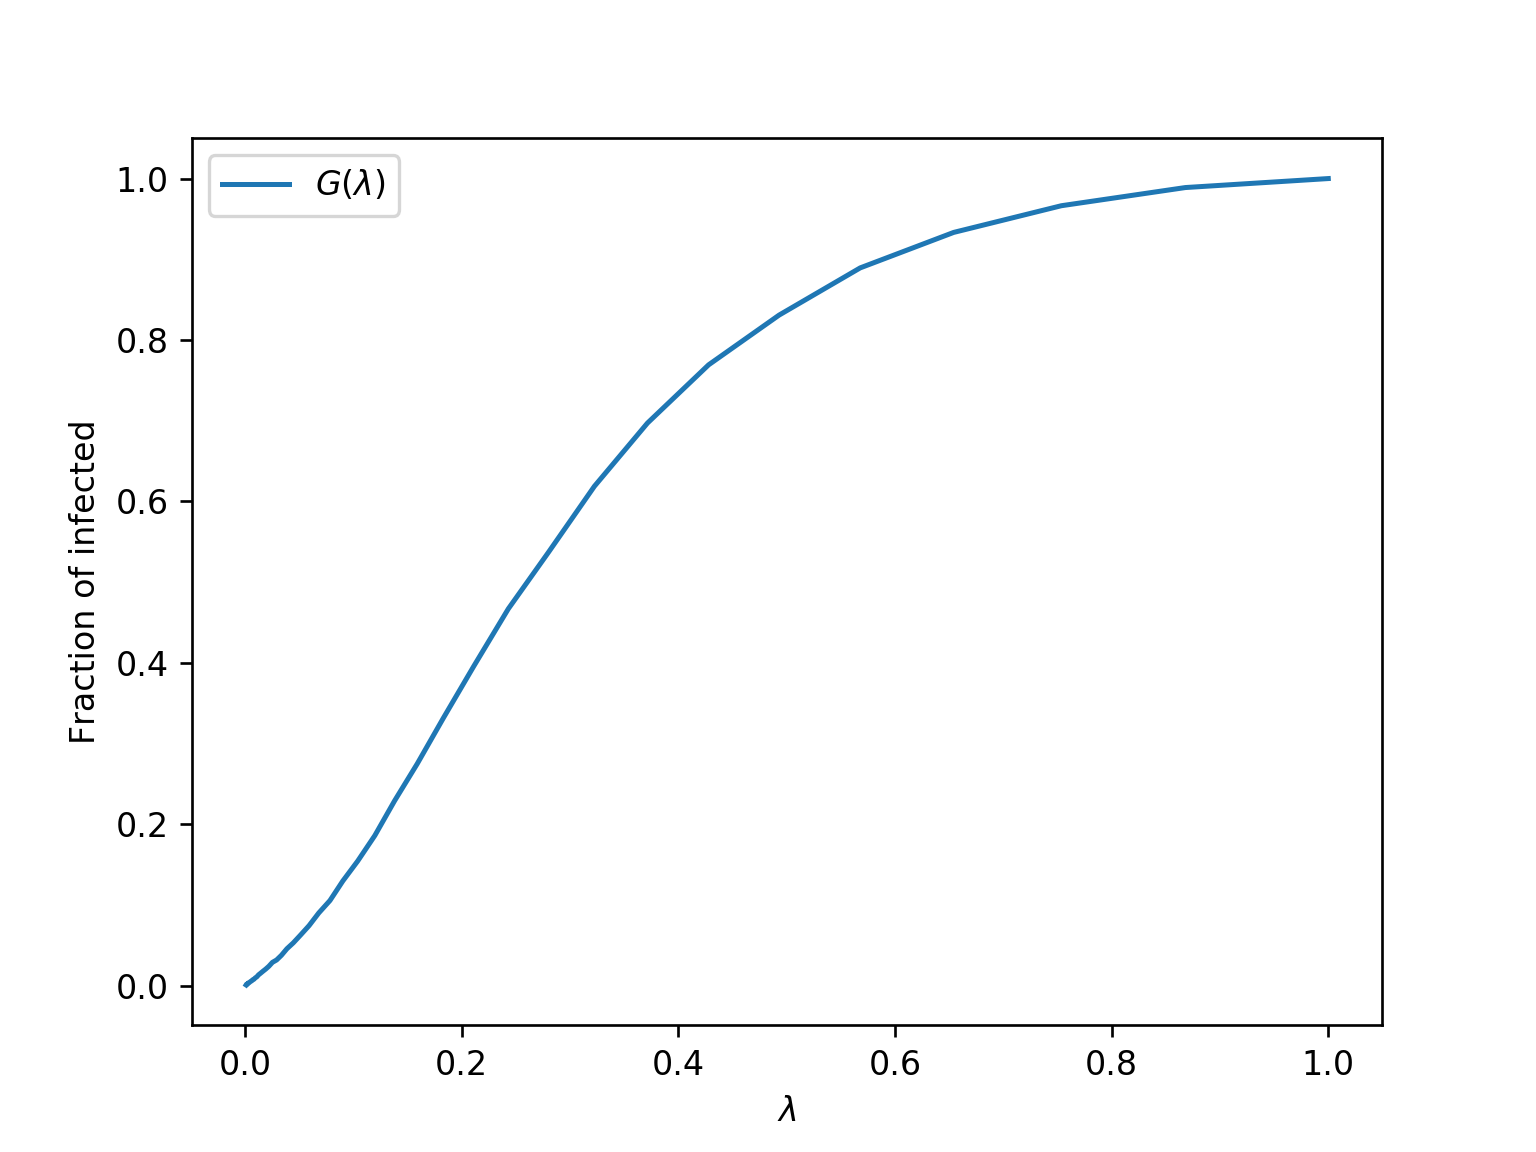

In [26]:
plt.figure(dpi=300)
plt.plot(g_df['lambda'], g_df['G'], label='$G(\lambda)$')
plt.xlabel('$\lambda$')
plt.ylabel('Fraction of infected')
plt.xticks([0.0, 0.2, 0.4, 0.6, 0.8, 1.0])
plt.legend()

In [15]:
plt.xticks([0, 38, 44, 47, 49])

([<matplotlib.axis.XTick at 0x26b079432c8>,
 <a list of 5 Text xticklabel objects>)

In [11]:
plt.xticks([0.0, 0.2, 0.4, 0.6, 0.8, 1.0], [0.0, 0.2, 0.4, 0.6, 0.8, 1.0])

([<matplotlib.axis.XTick at 0x26b079432c8>,
 <a list of 6 Text xticklabel objects>)

<IPython.core.display.Javascript object>


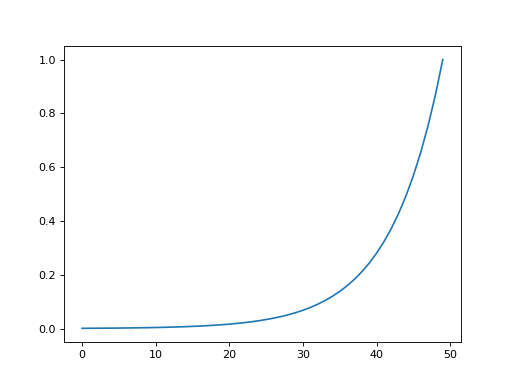

In [25]:
plt.figure()
plt.plot(range(0,50),g_df['lambda'])

In [21]:
g_df['lambda'].reset_index()

,index,lambda
0,0,0.0009765625
1,1,0.001124953927697749
2,2,0.0012958938515892147
3,3,0.0014928085793020427
4,4,0.0017196450555768113
5,5,0.001980949974545562
6,6,0.002281960913344293
7,7,0.002628711313735071
8,8,0.003028151415981853
9,9,0.003488287568970021


In [24]:
g_df['lambda'] = g_df['lambda'].astype(float)

In [27]:
calc = attack_rate.AttackRate()

<IPython.core.display.Javascript object>


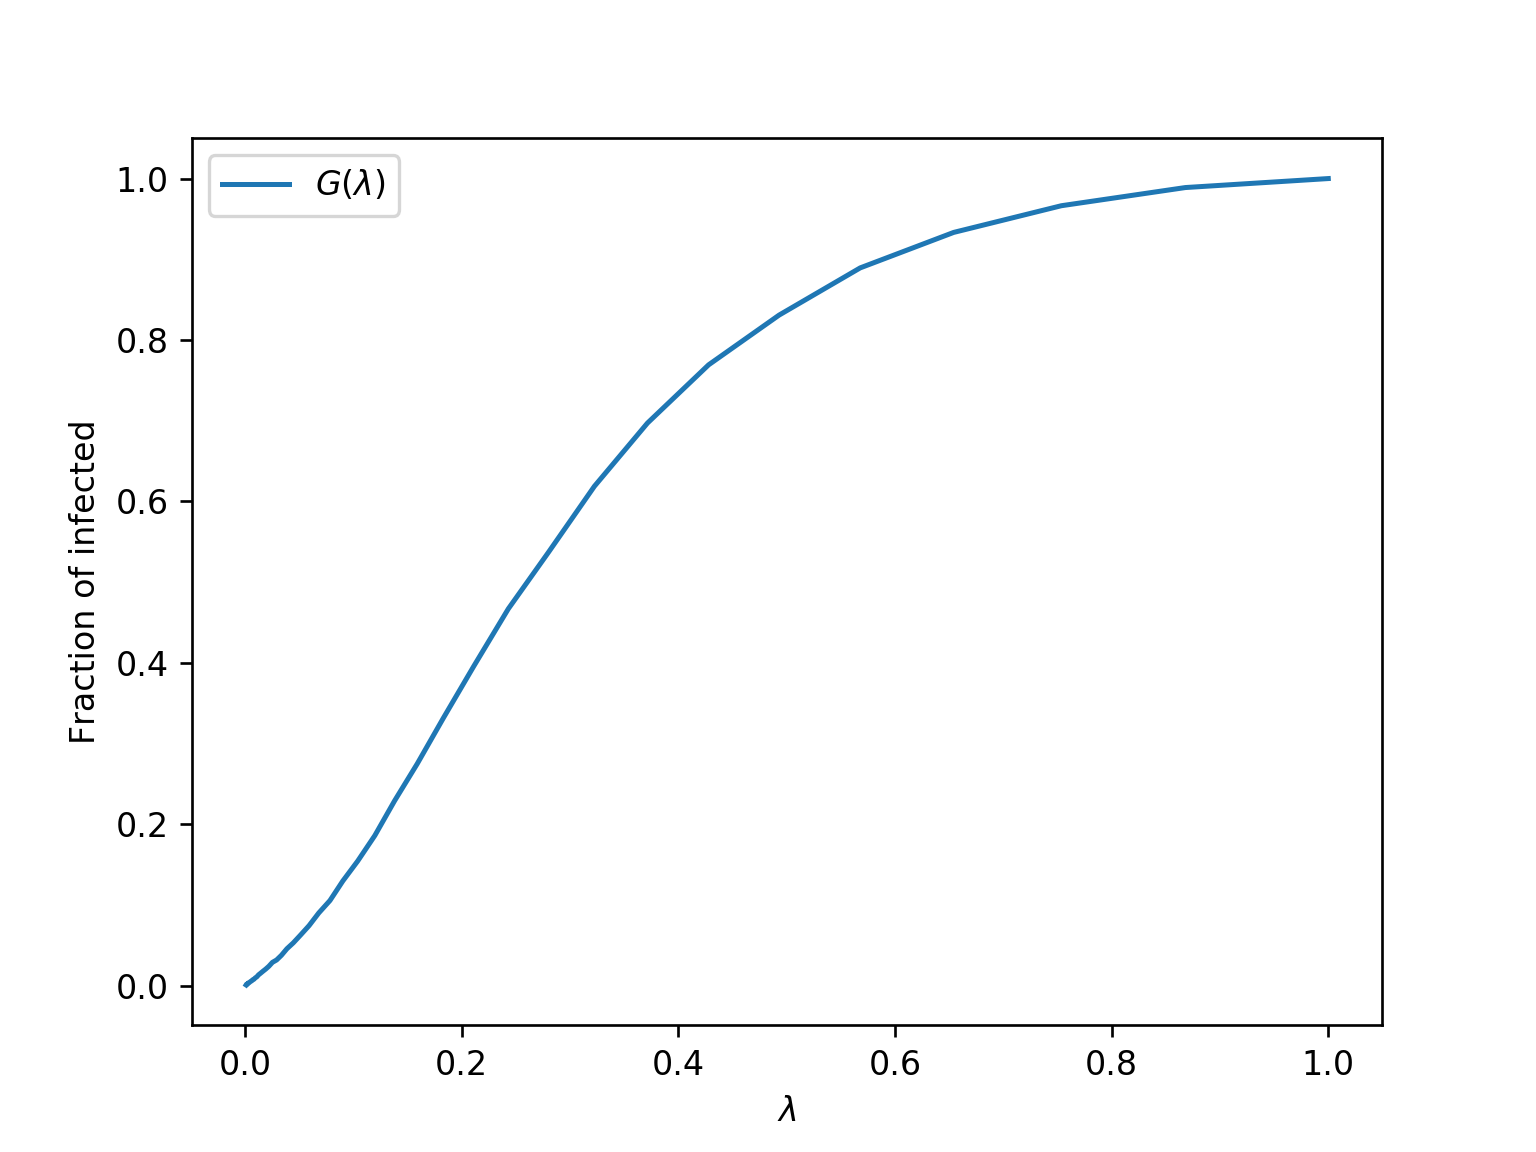

In [28]:
calc.plot_g_function(g_df)

In [29]:
287454 / 0.006350

45268346.45669291

In [30]:
45268346.45669291 * 0.010681

483511.20850393694